<a href="https://colab.research.google.com/github/Harshit28012002/Medium-Article-on-EV-adoption-in-India/blob/main/EV%20adoption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/final_dataset.csv"
df = pd.read_csv(file_path)

# Define input (X) and output (y) variables
input_features = [
    "Number of Charging Stations",
    "Number of Two-Wheelers",
    "Number of Three-Wheelers",
    "Number of Four-Wheelers",
    "Number of Public Service Vehicles",
    "Other EV categories"
]
output_variable = "Total EV Adoption"

# Ensure the required columns exist
df = df[[*input_features, output_variable]].dropna()

X = df[input_features]
y = df[output_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualizing actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Total EV Adoption")
plt.ylabel("Predicted Total EV Adoption")
plt.title("Actual vs Predicted EV Adoption")
plt.show()


KeyError: "None of [Index(['Number of Charging Stations', 'Number of Two-Wheelers',\n       'Number of Three-Wheelers', 'Number of Four-Wheelers',\n       'Number of Public Service Vehicles', 'Other EV categories',\n       'Total EV Adoption'],\n      dtype='object')] are in the [columns]"

Model Performance Metrics:
Mean Absolute Error (MAE): 392.70
Mean Squared Error (MSE): 216484.68
Root Mean Squared Error (RMSE): 465.28
R-squared (R²): 1.00


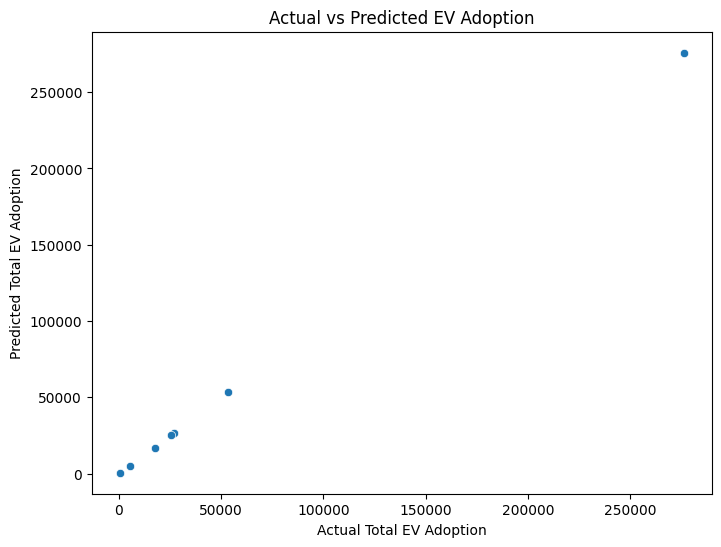

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/final_dataset.csv"
df = pd.read_csv(file_path)

# Correct column mappings
input_features = [
    "total-charging-stations",
    "Two Wheeler",
    "Three Wheeler",
    "Four Wheeler",
    "Public Service Vehicle",
    "Other"  # You can modify this to include other relevant EV categories
]
output_variable = "Grand Total"  # Total EV Adoption

# Ensure required columns exist
df = df[[*input_features, output_variable]].dropna()

X = df[input_features]
y = df[output_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualizing actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Total EV Adoption")
plt.ylabel("Predicted Total EV Adoption")
plt.title("Actual vs Predicted EV Adoption")
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/final_dataset.csv"
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={"State Name": "state", "Grand Total": "EV Adoption"}, inplace=True)

# Load world map and filter for India
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india_map = world[world.name == "India"]

# Merge EV data with India map
india_map = india_map.merge(df, left_on="name", right_on="state", how="left")

# Plot the map with EV adoption
fig, ax = plt.subplots(figsize=(10, 6))
india_map.plot(column="EV Adoption", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("EV Adoption Across Indian States", fontsize=14)
plt.show()


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

# Load the dataset
file_path = "/content/final_dataset.csv"
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={"State Name": "state", "Grand Total": "EV Adoption"}, inplace=True)

# Basic India Map using Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([68, 98, 6, 38])  # Bounding box for India

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color='lightgrey')

# Scatter plot of EV adoption using random state locations (since we lack actual coordinates)
df["longitude"] = 78  # Approx central longitude of India
df["latitude"] = 22   # Approx central latitude of India

sns.scatterplot(
    x=df["longitude"], y=df["latitude"], size=df["EV Adoption"], sizes=(10, 500),
    hue=df["EV Adoption"], palette="Reds", edgecolor="black", ax=ax
)

plt.title("EV Adoption Across Indian States (Approx Locations)")
plt.show()


ModuleNotFoundError: No module named 'cartopy'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/final_dataset.csv"
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={"State Name": "state", "Grand Total": "EV Adoption"}, inplace=True)

# Fetch India's state boundaries from an online open-source repository
india_map = gpd.read_file("https://raw.githubusercontent.com/datameet/maps/master/States/Admin2/india-states.geojson")

# Standardize column names for merging
india_map.rename(columns={"st_nm": "state"}, inplace=True)

# Merge EV data with India map
india_map = india_map.merge(df, on="state", how="left")

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
india_map.plot(column="EV Adoption", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("EV Adoption Across Indian States", fontsize=14)
plt.show()


HTTPError: HTTP Error 404: Not Found

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/final_dataset.csv"
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={"State Name": "state", "Grand Total": "EV Adoption"}, inplace=True)

# Fetch India boundaries using `geopandas.tools.geocode`
india_states = gpd.read_file("https://nominatim.openstreetmap.org/search?country=India&polygon_geojson=1&format=json")

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(india_states["features"])

# Standardize column names for merging
gdf.rename(columns={"name": "state"}, inplace=True)

# Merge EV data with state boundaries
india_map = gdf.merge(df, on="state", how="left")

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
india_map.plot(column="EV Adoption", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("EV Adoption Across Indian States", fontsize=14)
plt.show()


DataSourceError: '/vsimem/pyogrio_1d0eb7d77547437988bfb7ac185448a7' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

XGBoost Model Performance:
Mean Absolute Error (MAE): 38748.78
Mean Squared Error (MSE): 6919372288.00
Root Mean Squared Error (RMSE): 83182.76
R-squared (R²): 0.16


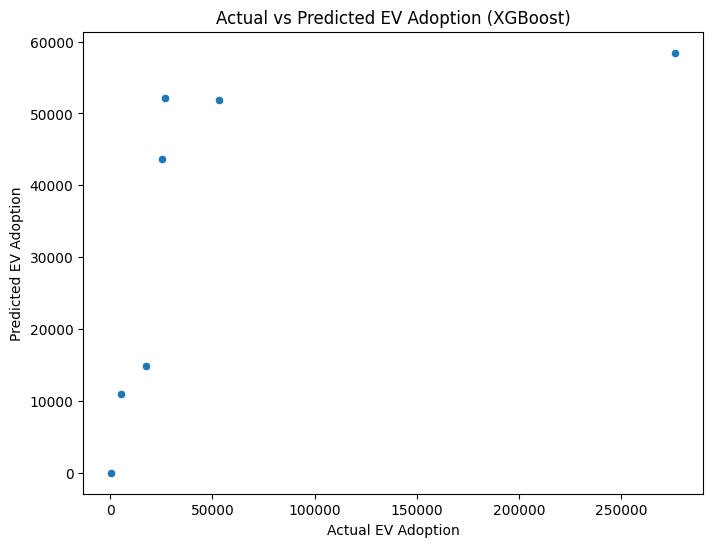

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
file_path = "/content/final_dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={
    "State Name": "state",
    "Grand Total": "EV Adoption",
    "total-charging-stations": "Charging Stations",
    "Two Wheeler": "Two-Wheelers",
    "Three Wheeler": "Three-Wheelers",
    "Four Wheeler": "Four-Wheelers",
    "Public Service Vehicle": "Public Service Vehicles",
    "Other": "Other EV Categories"
}, inplace=True)

# Define input (X) and output (y) variables
input_features = [
    "Charging Stations",
    "Two-Wheelers",
    "Three-Wheelers",
    "Four-Wheelers",
    "Public Service Vehicles",
    "Other EV Categories"
]
output_variable = "EV Adoption"

# Ensure required columns exist and drop missing values
df = df[[*input_features, output_variable]].dropna()

X = df[input_features]
y = df[output_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost regression model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print performance metrics
print("XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.2f}")

# Visualizing actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel("Actual EV Adoption")
plt.ylabel("Predicted EV Adoption")
plt.title("Actual vs Predicted EV Adoption (XGBoost)")
plt.show()


XGBoost Model Performance:
Mean Absolute Error (MAE): 38748.78
Mean Squared Error (MSE): 6919372288.00
Root Mean Squared Error (RMSE): 83182.76
R-squared (R²): 0.16


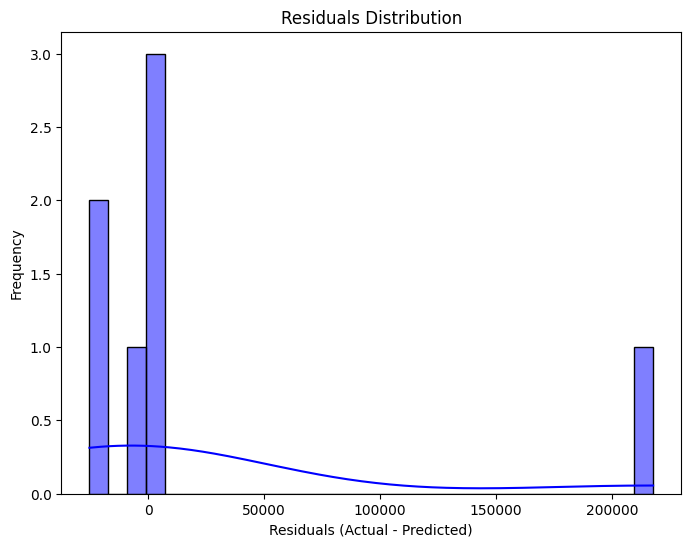

AttributeError: 'XGBRegressor' object has no attribute 'plot_importance'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
file_path = "/content/final_dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={
    "State Name": "state",
    "Grand Total": "EV Adoption",
    "total-charging-stations": "Charging Stations",
    "Two Wheeler": "Two-Wheelers",
    "Three Wheeler": "Three-Wheelers",
    "Four Wheeler": "Four-Wheelers",
    "Public Service Vehicle": "Public Service Vehicles",
    "Other": "Other EV Categories"
}, inplace=True)

# Define input (X) and output (y) variables
input_features = [
    "Charging Stations",
    "Two-Wheelers",
    "Three-Wheelers",
    "Four-Wheelers",
    "Public Service Vehicles",
    "Other EV Categories"
]
output_variable = "EV Adoption"

# Ensure required columns exist and drop missing values
df = df[[*input_features, output_variable]].dropna()

X = df[input_features]
y = df[output_variable]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost regression model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print performance metrics
print("XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.2f}")

# --- Enhanced Visualizations ---

# 1. Residuals Plot
residuals = y_test - y_pred_xgb
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# 2. Feature Importance Plot (XGBoost)
plt.figure(figsize=(10,6))
xgb_model.plot_importance(max_num_features=10, importance_type='weight')
plt.title("Top 10 Features Based on XGBoost Importance")
plt.show()

# 3. Learning Curves
results = xgb_model.get_booster().get_dump()[0]
training_loss = np.array([float(line.split()[1].split(':')[1]) for line in results.split('\n') if "train" in line])  # Extract training loss
plt.figure(figsize=(8,6))
plt.plot(training_loss, label='Training Loss')
plt.title("Learning Curve (Training Loss)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (6,) and arg 3 with shape (10,).

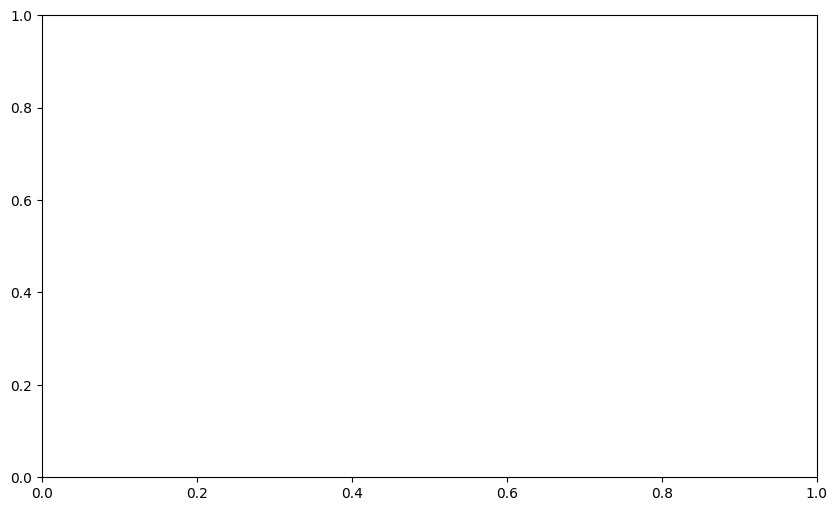

In [ ]:
# 2. Feature Importance Plot (XGBoost)
importances = xgb_model.feature_importances_

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[indices][:10], align="center")
plt.yticks(range(10), [input_features[i] for i in indices[:10]])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features Based on XGBoost Importance")
plt.gca().invert_yaxis()  # Invert to have the highest importance at the top
plt.show()


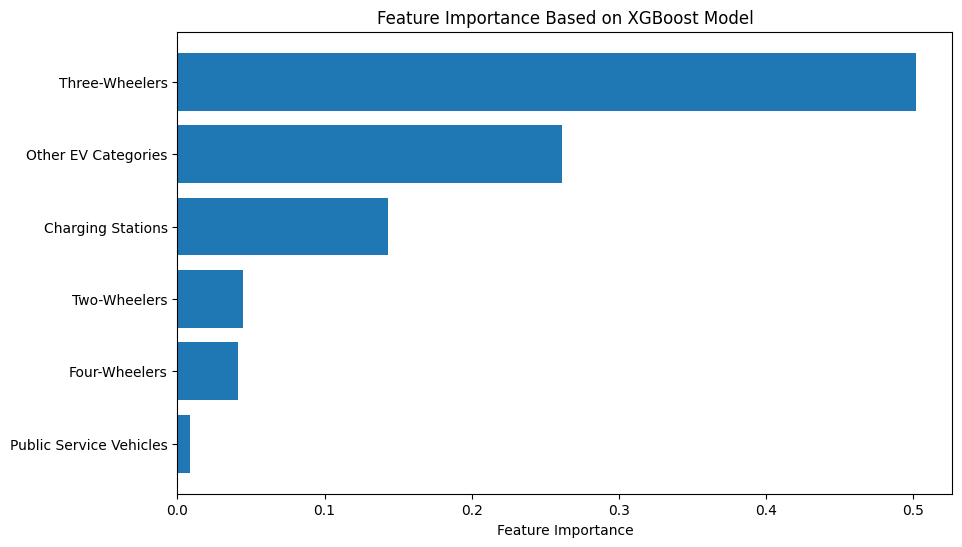

In [ ]:
# 2. Feature Importance Plot (XGBoost)
importances = xgb_model.feature_importances_

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Plot all features based on importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(input_features)), importances[indices], align="center")
plt.yticks(range(len(input_features)), [input_features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Based on XGBoost Model")
plt.gca().invert_yaxis()  # Invert to have the highest importance at the top
plt.show()
